#### Importing Basic Libraries


In [1]:
import pandas as pd
import numpy as np 
import warnings
warnings.filterwarnings('ignore')

In [2]:
### Importing the dataset
df =pd.read_csv(r'C:\Users\DELL\Downloads\avocado.csv')
df.tail() ### Checking the dataset 

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [3]:
### First we removing the Unnamed: 0, which dose not has any conribution the model building.
df.drop(columns='Unnamed: 0', inplace=True)

In [4]:
# Checking the dataset shape 
df.shape

(18249, 13)

In [5]:
### Checking the null values in dataset
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

### There are no null values in the the dataset

In [6]:
### Checking the datatype of the dataset 
df.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [7]:
### The Date column dose not has any conribution the model building. So, I am dropping the column.
df.drop(columns='Date', inplace=True)

## Now I will change the categorical data into Intergers as the model will understand only integers 

In [8]:
### Importing label encoder
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder() ## Initialzing the labeEncoder
col = ['type','region']
df[col] = df[col].apply(le.fit_transform) 
df.head() ### Checking the dataset that the model 

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0


In [9]:
### Checking the datatype again to check the datatype that it will changed to integer or not
df.dtypes

AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type              int32
year              int64
region            int32
dtype: object

### Now all the columns are in same datatype.

## EDA 

In [10]:
### Importing the basic visualization matrix
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

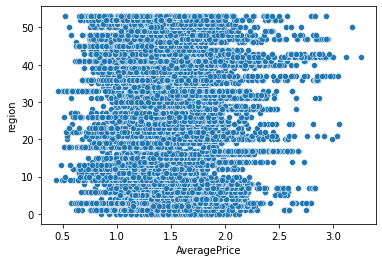

In [11]:
#### Plotting scatterplot to check the trend between features and target
sns.scatterplot(df['AveragePrice'],df['region'])
plt.show()

### Conclusion - Average Price feature has good trend with target

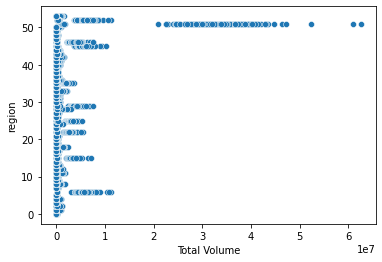

In [12]:
sns.scatterplot(df['Total Volume'],df['region'])
plt.show()

### Conclusion - Total Volume feature has not good trend with target

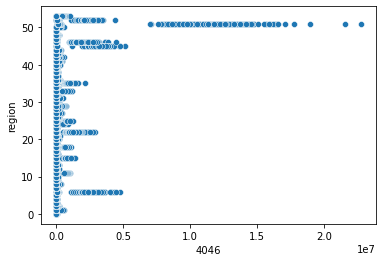

In [13]:
sns.scatterplot(df['4046'],df['region'])
plt.show()

### Conclusion - 4046 feature has normal trend with target

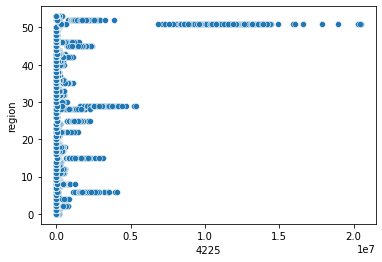

In [14]:
sns.scatterplot(df['4225'],df['region'])
plt.show()

### Conclusion - 4225 feature has normal trend with target

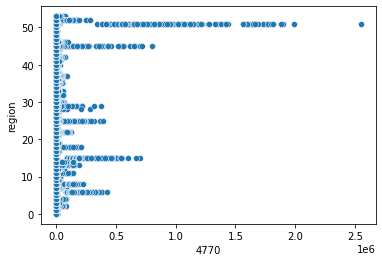

In [15]:
sns.scatterplot(df['4770'],df['region'])
plt.show()

### Conclusion - 4770 feature has normal trend with target

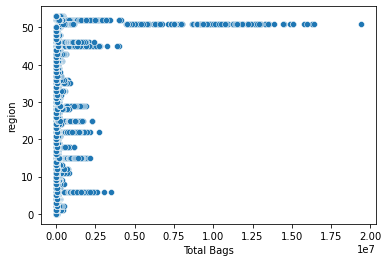

In [16]:
sns.scatterplot(df['Total Bags'],df['region'])
plt.show()

### Conclusion - Total bags feature has normal trend with target

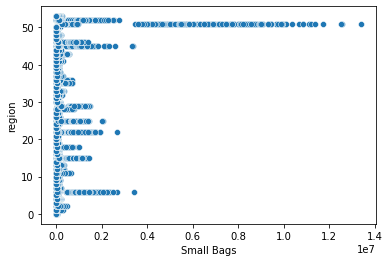

In [17]:
sns.scatterplot(df['Small Bags'],df['region'])
plt.show()

### Conclusion - Small bags feature has normal trend with target

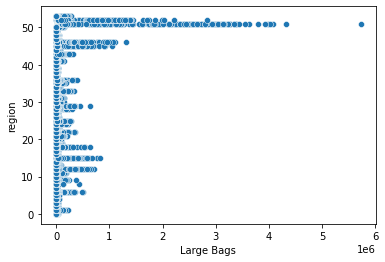

In [18]:
sns.scatterplot(df['Large Bags'],df['region'])
plt.show()

### Conclusion - large bags feature has normal trend with target

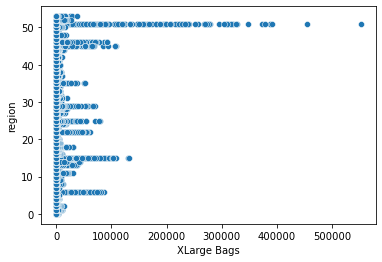

In [19]:
sns.scatterplot(df['XLarge Bags'],df['region'])
plt.show()

### Conclusion - Xlarge bags feature has normal trend with target

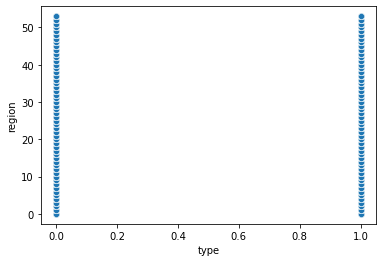

In [20]:
sns.scatterplot(df['type'],df['region'])
plt.show()

### Conclusion - type feature has good trend with target

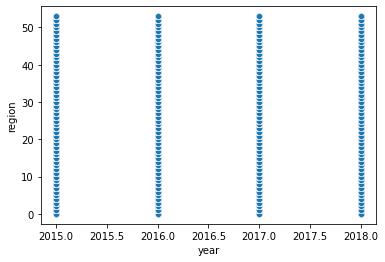

In [21]:
sns.scatterplot(df['year'],df['region'])
plt.show()

### Conclusion - Year feature has good trend with target

### All the feature has good trend with target. Now I will check the multicollinearity of the dataset

## Checking the multicolinearity by using Heatmap.

<function matplotlib.pyplot.show(close=None, block=None)>

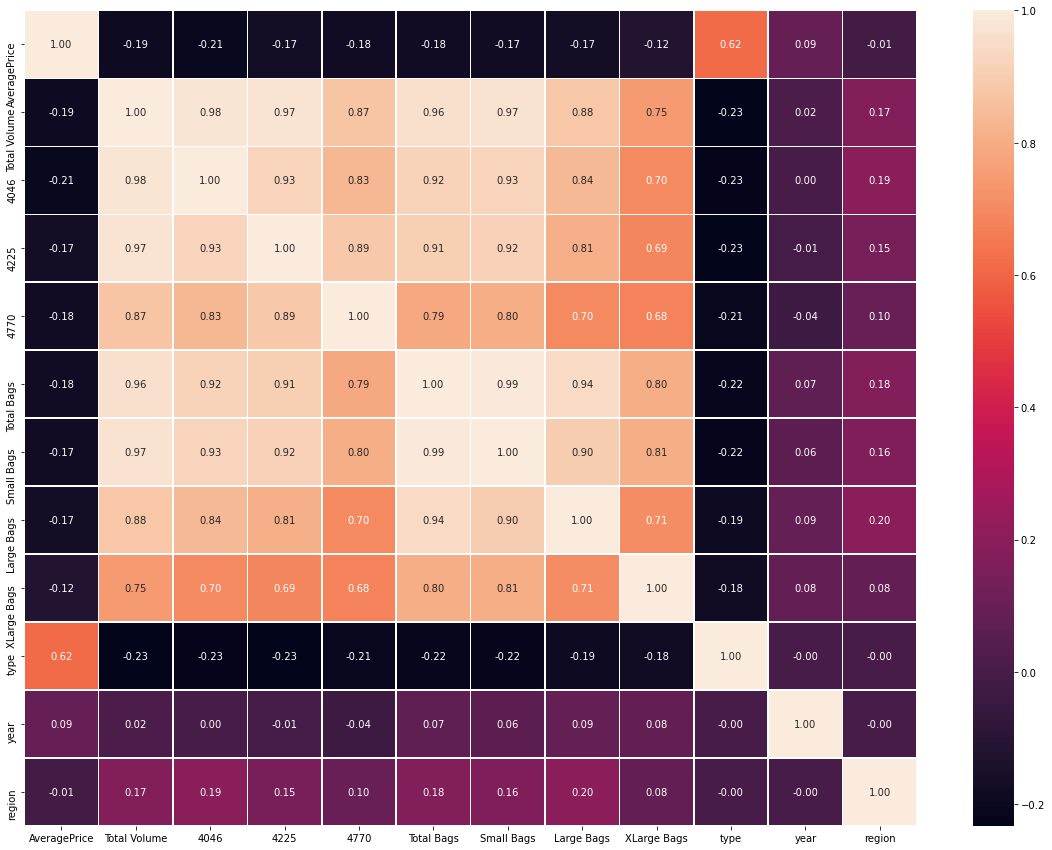

In [22]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True, fmt='.2f', linewidths=0.5)
plt.show

### Most of feature has multicollinearity with each other but I can not drop the column as there are only 12 feature are available for model building. 

### The target has maximum trend with - Large bag(20%)
### The target has minimum trend with - year(0%)

### No feature has strong trend with target. So, I will keep all feature for Model building.

## Plotting distplot to check the distribution of data.

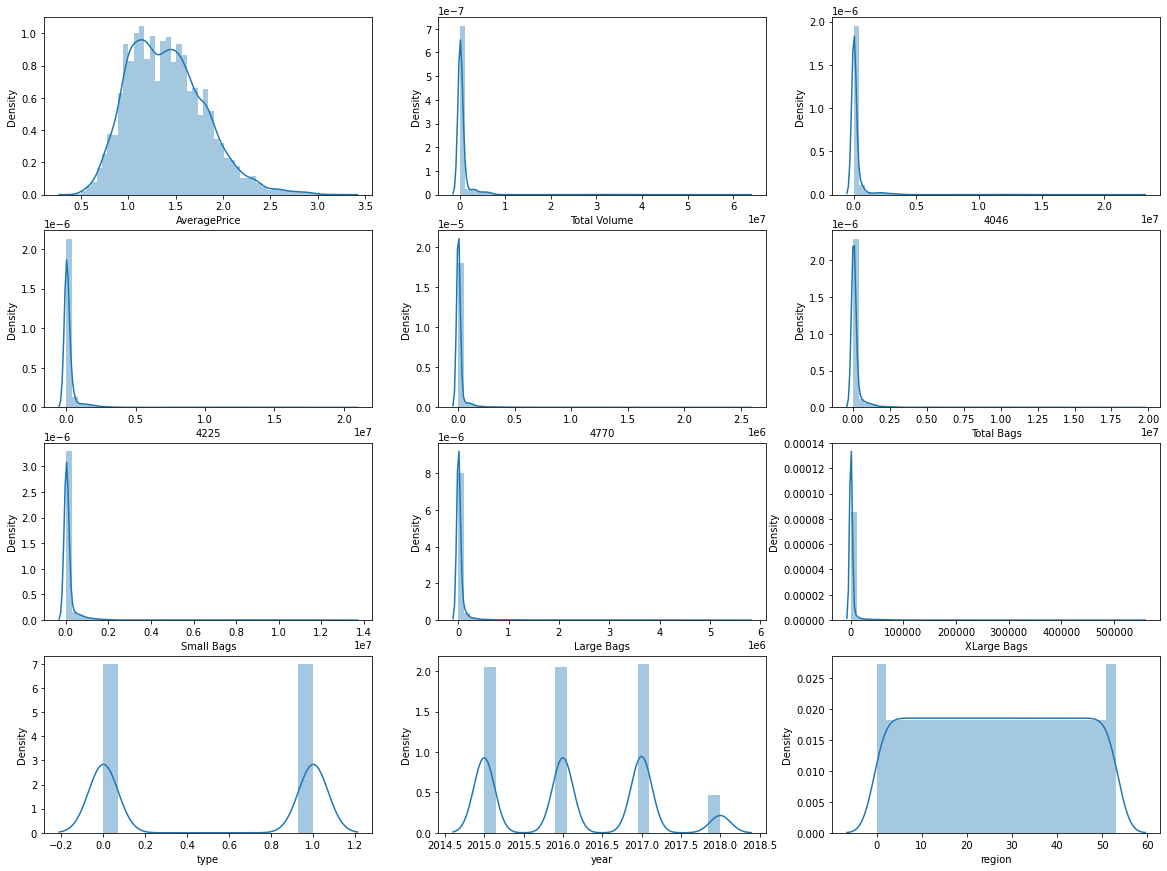

In [23]:
plt.figure(figsize=(20,15))
pn=1
for column in df:
    if pn <= 12:
        plt.subplot(4,3, pn)
        sns.distplot(df[column])
        plt.xlabel(column)
    pn+=1
plt.show()

### All feature dose not has normal distribution expect avarage price. All features are right skewed. I will deal with skewness but before that I will check stats of the dataset.

<function matplotlib.pyplot.show(close=None, block=None)>

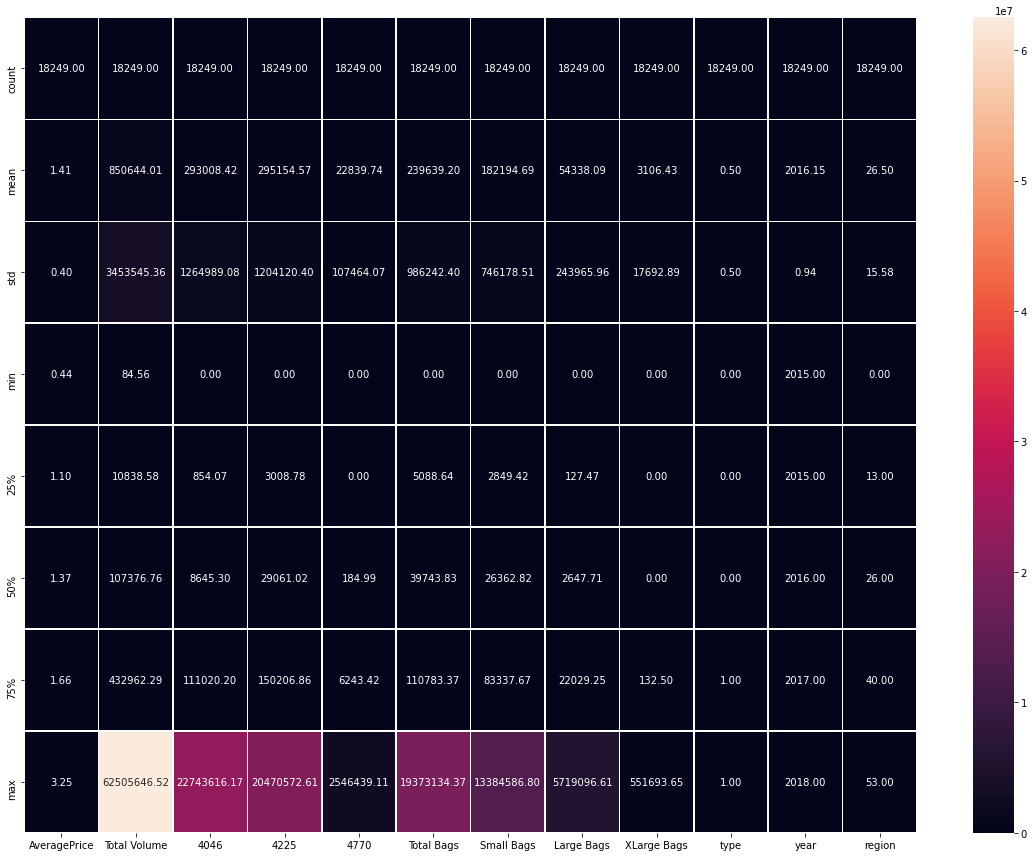

In [24]:
plt.figure(figsize=(20,15))
sns.heatmap(df.describe(), annot=True, fmt='.2f', linewidths=0.5)
plt.show

#### Stats of all the dataset show normal but its shows that Total volume, 4046,4225,4770 and bags has some outliers. So, I will cross check this with boxplot and this still shows there will deal with outliers

### Checking the Skewness.

In [25]:
x=df.drop(columns='region')
y=df['region']
x.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
type             0.000329
year             0.215339
dtype: float64

### All the column are skewed expect Avarage price, type and year. Let fix it with power transform.

#### Keeping the thresold of +\-0.5. Now going to dealing with skewness with the help of power transform. 

In [26]:
from sklearn.preprocessing import power_transform
x_new = power_transform(x)
x=pd.DataFrame(x_new, columns=x.columns)

In [27]:
x.skew() ### Checking is skewness is removed or not

AveragePrice    0.005596
Total Volume    0.011171
4046           -0.022679
4225           -0.017740
4770            0.032184
Total Bags     -0.001626
Small Bags      0.007058
Large Bags     -0.073809
XLarge Bags     0.793520
type            0.000329
year            0.213156
dtype: float64

### All the features are now skew free

### Checking the outliers


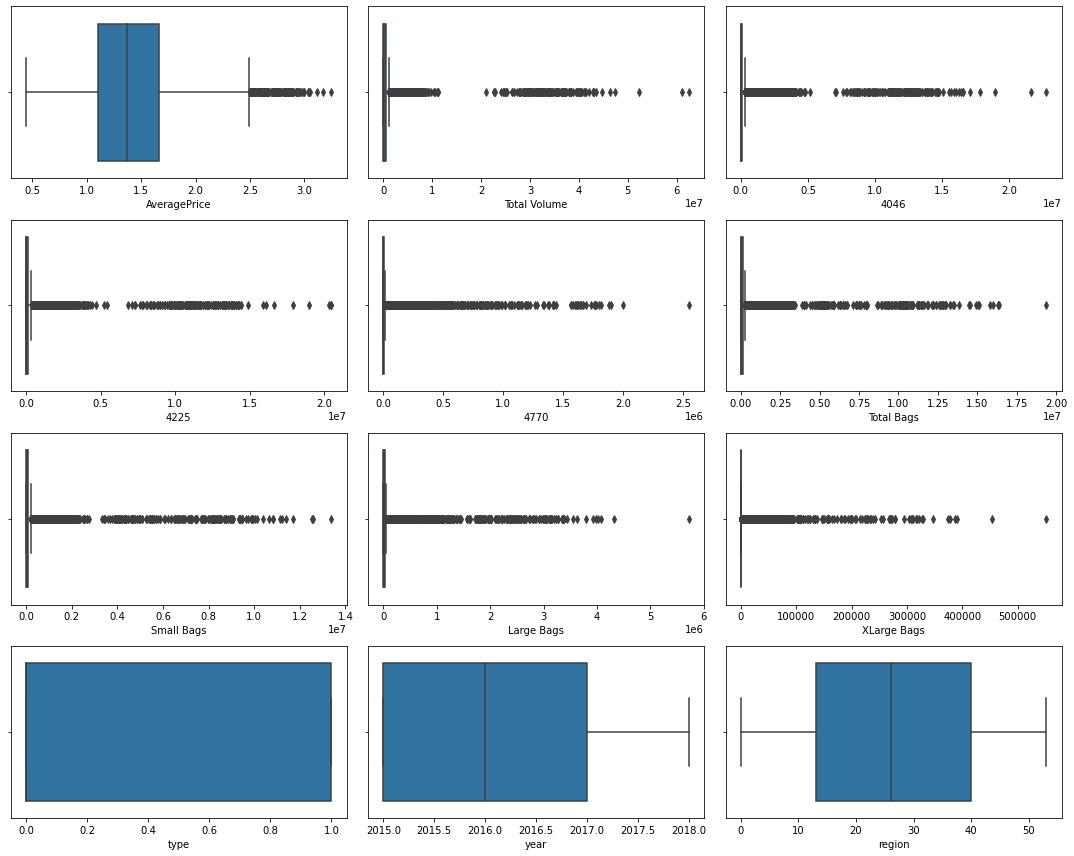

In [28]:
plt.figure(figsize=(15,12))
pn = 1
for column in df:
    if pn <= 12:
        ax = plt.subplot(4,3, pn)
        sns.boxplot(df[column])
        plt.xlabel(column)
    pn+=1
plt.tight_layout()

### All the features has outliers expect tyep,year and region. Now going to fix this outliers with zscore.

In [29]:
### Importing Zscore
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
z.shape

(18249, 12)

In [30]:
thresold =3
print(np.where(z>3))

(array([  346,   359,   780, ..., 17304, 17402, 17428], dtype=int64), array([2, 2, 8, ..., 0, 0, 0], dtype=int64))


In [31]:
df_new =df[(z<3).all(axis=1)]
df_new.shape

(17651, 12)

### Data Loss

In [32]:
data_loss = (18249-17651)/18249*100
print("Data Loss of the dataset after removing the outliers", data_loss )

Data Loss of the dataset after removing the outliers 3.276891884486821


### Data loss is 3.27% which is acceptable. 

In [33]:
### Importing some preprocesing library for model 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [34]:
### Scaling then feature with standard scaler 
sc = StandardScaler()
x_scaled= sc.fit_transform(x)

In [35]:
#### Splitting the dataset into traing data and testing data
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y, test_size=0.20, random_state=25)
print(len(x_train), len(y_train), len(x_test), len(y_test))

14599 14599 3650 3650


In [36]:
### Importing the model building libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

In [37]:
### Importing the LogisticRegression and checking the score and cross validation score 
lr= LogisticRegression()
lr.fit(x_train,y_train)
pred_lr=lr.predict(x_test)
acc_lr =accuracy_score(y_test,pred_lr)
scr = cross_val_score(lr, x_scaled,y, cv=5)
Clas_r = classification_report(y_test,pred_lr)
con = confusion_matrix(y_test,pred_lr)
Corss_lr = scr.mean()

print("\n LogisticRegression Model Accuracy ",  '\nAccuracy_score for LogisticRegression model', acc_lr*100, "\n Cross Validation score is ",Corss_lr*100)


 LogisticRegression Model Accuracy  
Accuracy_score for LogisticRegression model 54.57534246575343 
 Cross Validation score is  39.97426054051213


In [38]:
### Importing the RandomForestClassifier and  checking the score and cross validation score  
RFC= RandomForestClassifier()
RFC.fit(x_train,y_train)
pred_RFC=RFC.predict(x_test)
acc_RFC =accuracy_score(y_test,pred_RFC)
scr = cross_val_score(RFC, x_scaled,y, cv=5)
Corss_rfc = scr.mean()
Clas_r = classification_report(y_test,pred_RFC)
con = confusion_matrix(y_test,pred_RFC)

print("\n RandomForestClassifier Model Accuracy",  '\n\nAccuracy_score for RandomForestClassifier model', acc_RFC*100, "\n Cross Validation score is ",Corss_rfc*100)


 RandomForestClassifier Model Accuracy 

Accuracy_score for RandomForestClassifier model 90.46575342465754 
 Cross Validation score is  68.34234637374848


In [39]:
### Importing the DecisionTreeClassifier and checking the score and cross validation score  
DTC= DecisionTreeClassifier()
DTC.fit(x_train,y_train)
pred_DTC=DTC.predict(x_test)
acc_DTC =accuracy_score(y_test,pred_DTC)
scr = cross_val_score(DTC, x_scaled,y, cv=5)
Corss_dtc = scr.mean()
Clas_r = classification_report(y_test,pred_DTC)
con = confusion_matrix(y_test,pred_DTC)

print("\n DecisionTreeClassifier Model Accuracy",  '\n\nAccuracy_score for DecisionTreeClassifier model', acc_DTC*100, "\n Cross Validation score is ",Corss_dtc*100)


 DecisionTreeClassifier Model Accuracy 

Accuracy_score for DecisionTreeClassifier model 78.6027397260274 
 Cross Validation score is  55.985829106867335


In [40]:
### Importing the KNeighborsClassifier and checking the score and cross validation score 
KNC= KNeighborsClassifier()
KNC.fit(x_train,y_train)
pred_KNC=KNC.predict(x_test)
acc_KNC =accuracy_score(y_test,pred_KNC)
scr = cross_val_score(KNC, x_scaled,y, cv=5)
Corss = scr.mean()
Clas_r = classification_report(y_test,pred_KNC)
con = confusion_matrix(y_test,pred_KNC)
print("\n KNeighborsClassifier Model Accuracy",  '\n\nAccuracy_score for KNeighborsClassifier model', acc_KNC*100, "\n Cross Validation score is ",Corss*100)


 KNeighborsClassifier Model Accuracy 

Accuracy_score for KNeighborsClassifier model 84.65753424657534 
 Cross Validation score is  55.7229535583027


In [41]:
### Importing the SVC and checking the score and cross validation score
svc= SVC()
svc.fit(x_train,y_train)
pred_svc=svc.predict(x_test)
acc_svc =accuracy_score(y_test,pred_svc)
scr = cross_val_score(svc, x_scaled,y, cv=5)
Corss = scr.mean()
Clas_r = classification_report(y_test,pred_svc)
con = confusion_matrix(y_test,pred_svc)
print("\n SVC Model Accuracy",  '\n\nAccuracy_score for SVC model', acc_svc*100,"\n Cross Validation score is ",Corss*100)


 SVC Model Accuracy 

Accuracy_score for SVC model 81.31506849315069 
 Cross Validation score is  63.34487887467761


### I performed 5 model prediction Accuracy score and Cross Validation score, those score are mentioned below - 

#### Accuracy score and cross validation score for LogisticRegression model 54.57534246575343 and cross validation score is 39.97426054051213
#### Accuracy score cross validation score for RandomForestClassifier model 90.46575342465754 and cross validation score is 68.34234637374848
#### Accuracy score cross validation score for DecisionTreeClassifier model 78.6027397260274 and cross validation score is 55.985829106867335
#### Accuracy score cross validation score for KNeighborsClassifier model 84.65753424657534 and cross validation score is 55.7229535583027
#### Accuracy score cross validation score  for SVC model 81.31506849315069 and cross validation score is 63.34487887467761

### From the above, I conclude that I will go forward with LogisticRegression because the accuracy is not good but the difference between accuracy and cross validation score is less comparison to the other model. So, i will consider LogisticRegression but I can do hyperparameter tuning with LogisticRegression. May the Accuracy will increase.


In [76]:
from sklearn.model_selection import GridSearchCV
lr = LogisticRegression()
para = {'penalty':['12','11','elasticnet', 'none'],
       'multi_class':['auto', 'ovr', 'multinomial']}

In [77]:
gridsearch_lr= GridSearchCV(estimator=lr, param_grid=para, cv=5)
gridsearch_lr.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'multi_class': ['auto', 'ovr', 'multinomial'],
                         'penalty': ['12', '11', 'elasticnet', 'none']})

In [78]:
gridsearch_lr.best_params_

{'multi_class': 'auto', 'penalty': 'none'}

In [79]:
lr = LogisticRegression(multi_class='auto', penalty='none')

In [80]:
lr.fit(x_train,y_train)
pred_lr_grid=lr.predict(x_test)
acc_lr_grid =accuracy_score(y_test,pred_lr_grid)
scr = cross_val_score(lr, x_scaled,y, cv=5)
Clas_r_grid = classification_report(y_test,pred_lr)
con = confusion_matrix(y_test,pred_lr_grid)
Corss_lr_grid = scr.mean()

print("\n LogisticRegression Model Accuracy ",  '\nAccuracy_score for LogisticRegression model', acc_lr_grid*100, "\n Cross Validation score is ",Corss_lr_grid*100)


 LogisticRegression Model Accuracy  
Accuracy_score for LogisticRegression model 59.04109589041096 
 Cross Validation score is  43.48113388167897


### I Tried to increase the accuracy with hyperparameter, The accuracy increased but the cross validation difference is also increased. So, I will aslo check with RandomForestClassifier than decide which model I have to consider.

In [59]:
RFC= RandomForestClassifier()
para = {'n_estimators':range(1,5),
       'criterion':["entropy", "gini"],
        'max_depth':range(2,10),
    'min_samples_split':range(3,11),
    'min_samples_leaf':range(4,12)}

In [65]:
gridsearch= GridSearchCV(estimator=RFC, param_grid=para, cv=5)
gridsearch.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(2, 10),
                         'min_samples_leaf': range(4, 12),
                         'min_samples_split': range(3, 11),
                         'n_estimators': range(1, 5)})

In [66]:
gridsearch.best_params_

{'criterion': 'entropy',
 'max_depth': 9,
 'min_samples_leaf': 5,
 'min_samples_split': 6,
 'n_estimators': 4}

In [74]:
RFC = RandomForestClassifier( criterion='entropy',max_depth=9,min_samples_leaf= 5,min_samples_split=6,n_estimators=4)

In [75]:
RFC.fit(x_train,y_train)
pred_RFC_grid=RFC.predict(x_test)
acc_RFC_grid =accuracy_score(y_test,pred_RFC_grid)
scr = cross_val_score(RFC, x_scaled,y, cv=5)
Corss_rfc_grid = scr.mean()
Clas_r_grid = classification_report(y_test,pred_RFC_grid)
con = confusion_matrix(y_test,pred_RFC)
print("\n RandomForestClassifier Model Accuracy",  '\n\nAccuracy_score for RandomForestClassifier model', acc_RFC_grid*100, "\n Cross Validation score is ",Corss_rfc_grid*100)


 RandomForestClassifier Model Accuracy 

Accuracy_score for RandomForestClassifier model 70.76712328767123 
 Cross Validation score is  51.207485631266955


#### I Tried to tune parameter of RandomForestClassifier but did not get better result. So I am going to move forward with LogisticRegression Model

In [88]:
### Classification and Confusion metrix 
Class = classification_report(y_test,pred_lr_grid)
con = confusion_matrix(y_test,pred_lr_grid)

print("\t\t\tClassification Report is ", '\n', Class, "\n\t\t\tConfusion Matrix is ",'\n', con)

			Classification Report is  
               precision    recall  f1-score   support

           0       0.76      0.67      0.71        76
           1       0.29      0.41      0.34        69
           2       0.76      0.78      0.77        77
           3       0.68      0.50      0.58        72
           4       0.66      0.69      0.68        71
           5       0.49      0.58      0.53        59
           6       0.94      0.87      0.90        69
           7       0.63      0.71      0.67        62
           8       0.88      0.87      0.88        77
           9       0.54      0.82      0.65        62
          10       0.48      0.50      0.49        60
          11       0.74      0.74      0.74        57
          12       0.46      0.55      0.50        60
          13       0.49      0.34      0.40        80
          14       0.62      0.61      0.62        74
          15       0.84      0.77      0.80        69
          16       0.52      0.52      0.52       

## Conclusion - I considered LogisticRegression model 59.04109589041096 Cross Validation score is  43.48113388167897.

## Saving the model

In [89]:
import joblib
joblib.dump(lr, 'Avacado_Classification_region')

['Avacado_Classification_region']

# Moving to predicted the Avarage price for Avacado

### As we already did all dataset cleaning and dataset analysis for classification. So, I dont need to perform all the step, only perform the necessary step for building regression model

In [90]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0


## EAD

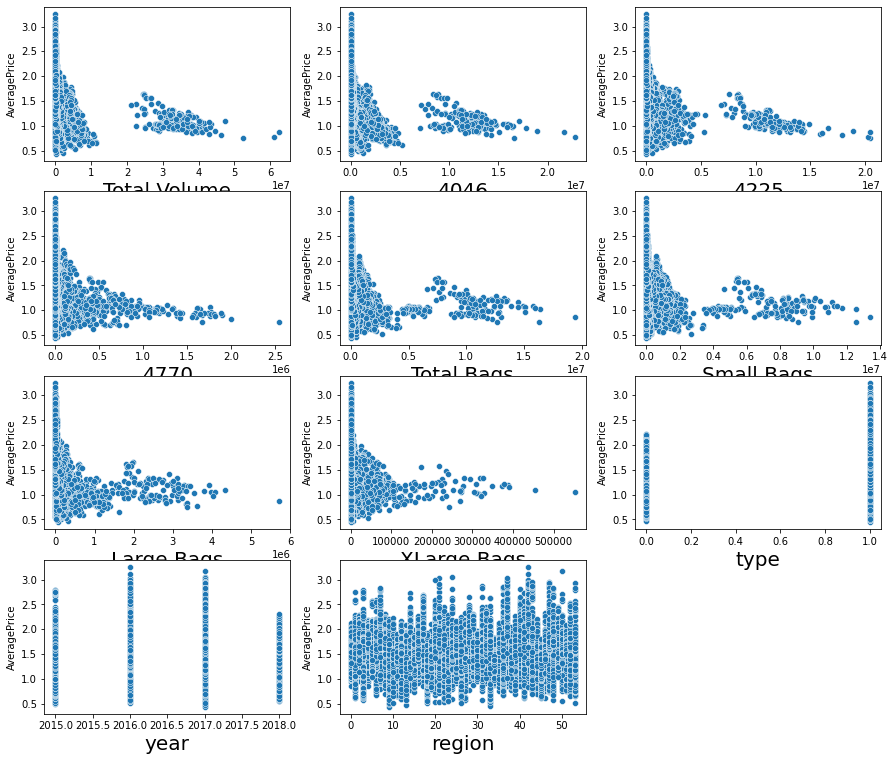

In [93]:
### Chechking the relation between target and feature 

x= df.drop(columns='AveragePrice')
y=df["AveragePrice"]
plt.figure(figsize=(15,13))
pn=1
for column in x:
    if pn <= 12:
        ax= plt.subplot(4,3, pn)
        sns.scatterplot(x[column],y)
        plt.xlabel(column, fontsize= 20)
    pn+=1
plt.show()

### Conclusion - AveragePrice has strond trend wit region and normal trend with other features. So, I am keeping all features for model building.

## Multicollinearity

<function matplotlib.pyplot.show(close=None, block=None)>

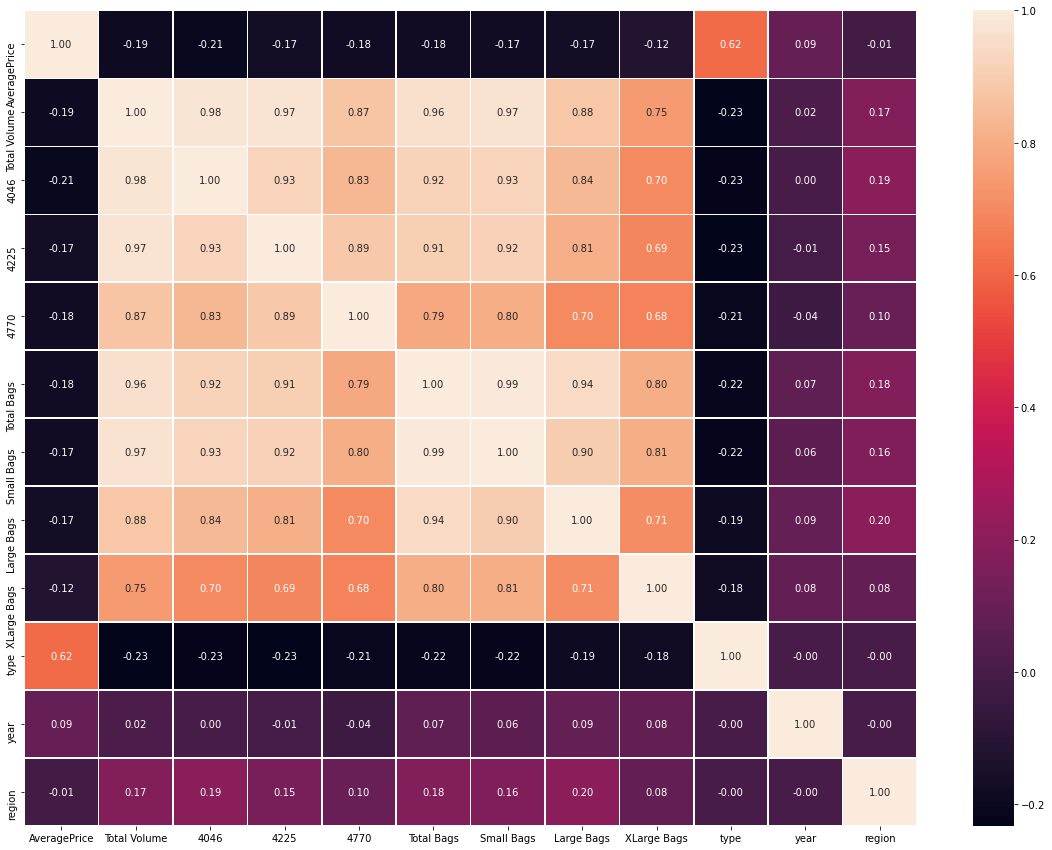

In [95]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True, fmt='.2f', linewidths=0.5)
plt.show

### Most of feature has multicollinearity with each other but I can not drop the column as there are only 12 feature are available for model building. 

### The target has maximum trend with - type(62%)
### The target has minimum trend with - year(1%)

### No feature has strong trend with target expect type. So, I will keep all feature for Model building.

### Checking the distribution of the dataset again

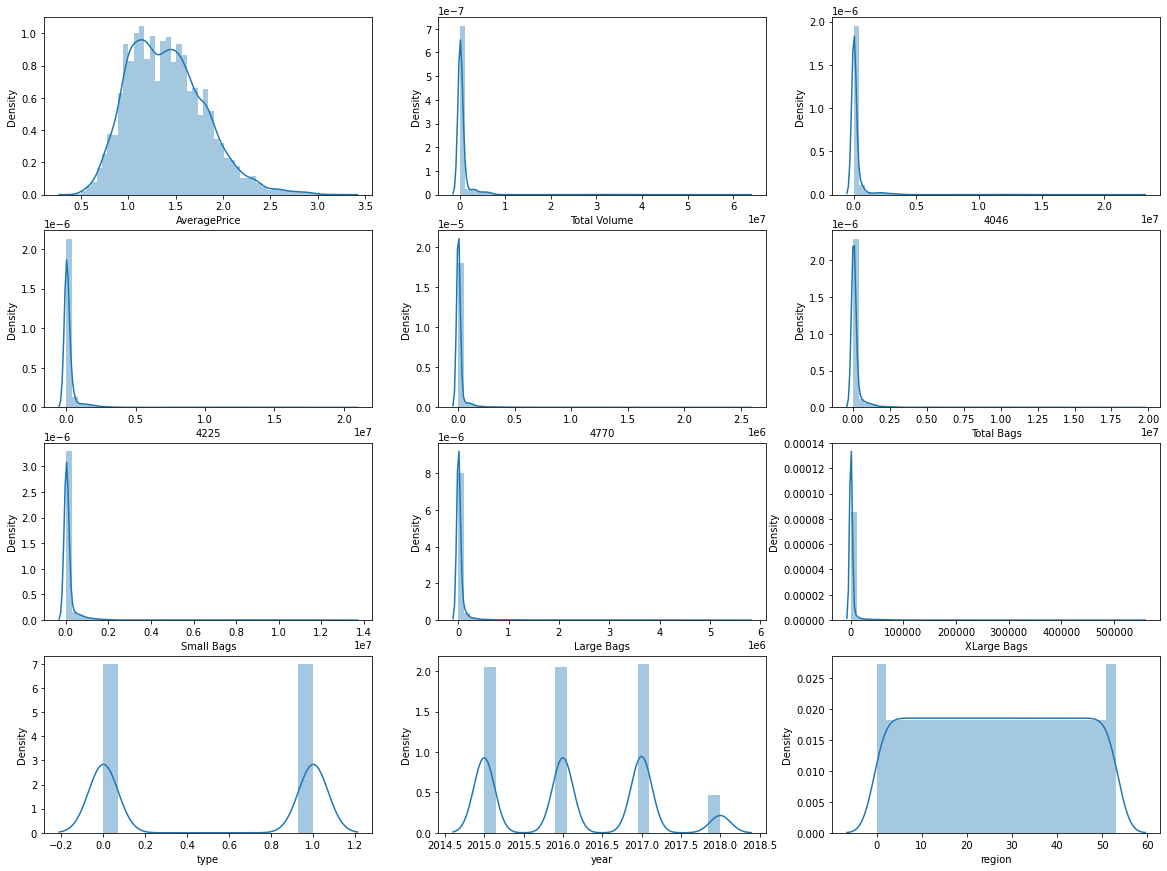

In [96]:
plt.figure(figsize=(20,15))
pn=1
for column in df:
    if pn <= 12:
        plt.subplot(4,3, pn)
        sns.distplot(df[column])
        plt.xlabel(column)
    pn+=1
plt.show()

### All feature dose not has normal distribution expect avarage price. All features are right skewed. I will deal with skewness but before that I will check stats of the dataset.

### Checking the skewness

In [97]:
x=df.drop(columns='AveragePrice')
y=df['AveragePrice']
x.skew()

Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
type             0.000329
year             0.215339
region           0.000030
dtype: float64

### All the column are skewed expect region, type and year.  Keeping the thresold of +\-0.5. Now going to dealing with skewness with the help of power transform. Let fix it with power transform.

In [98]:
x_new = power_transform(x)
x=pd.DataFrame(x_new, columns=x.columns)

In [100]:
x.skew().sort_values()

region         -0.261443
Large Bags     -0.073809
4046           -0.022679
4225           -0.017740
Total Bags     -0.001626
type            0.000329
Small Bags      0.007058
Total Volume    0.011171
4770            0.032184
year            0.213156
XLarge Bags     0.793520
dtype: float64

### Now there are no skewness in the features expect Xlarge Bags but I can not remove this, taking this as expecption.

### Checking the outliers

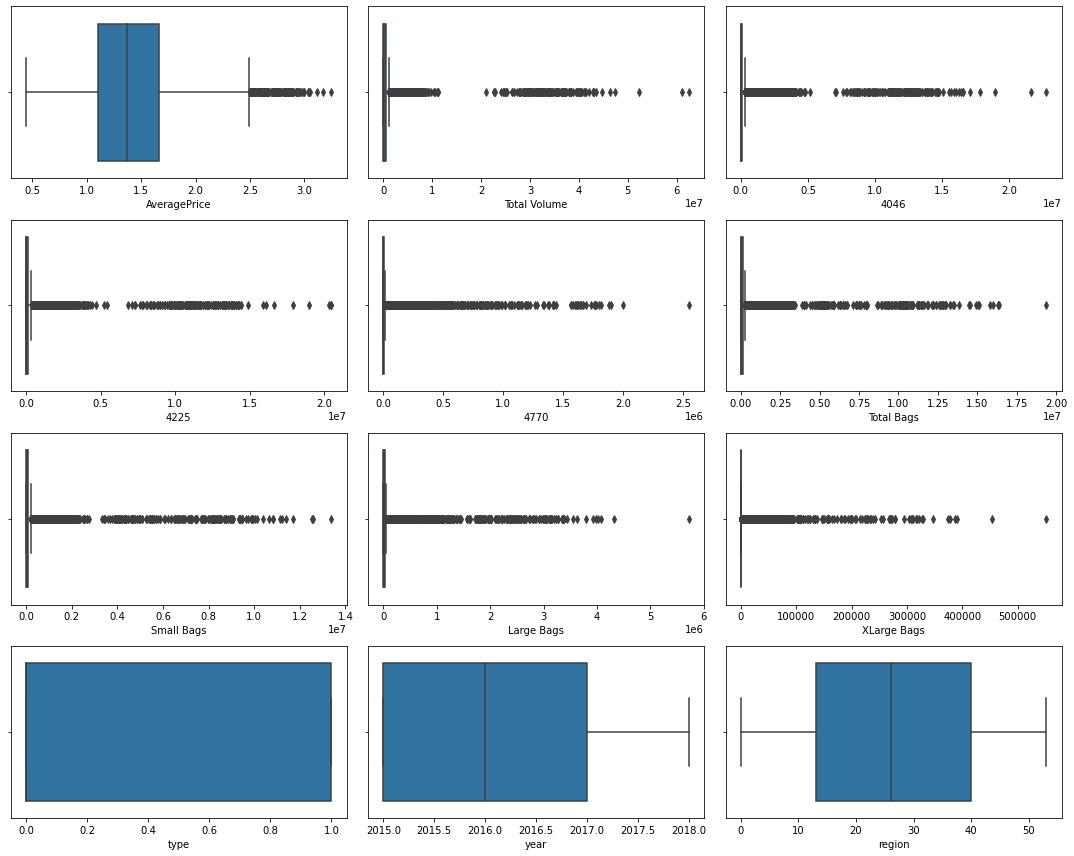

In [101]:
plt.figure(figsize=(15,12))
pn = 1
for column in df:
    if pn <= 12:
        ax = plt.subplot(4,3, pn)
        sns.boxplot(df[column])
        plt.xlabel(column)
    pn+=1
plt.tight_layout()

### All the features has outliers expect tyep,year and region. Now going to fix this outliers with zscore.

In [102]:
z=np.abs(zscore(df))
z.shape

(18249, 12)

In [103]:
thresold =3
print(np.where(z>3))

(array([  346,   359,   780, ..., 17304, 17402, 17428], dtype=int64), array([2, 2, 8, ..., 0, 0, 0], dtype=int64))


In [104]:
df_new =df[(z<3).all(axis=1)]
df_new.shape

(17651, 12)

In [105]:
data_loss = (18249-17651)/18249*100
print("Data Loss of the dataset after removing the outliers", data_loss )

Data Loss of the dataset after removing the outliers 3.276891884486821


### Dataloss is acceptable which is 3.27

### Now moving toward model building 

In [106]:
### Spliting the feature and target to proceed the model building
x=df.drop(columns='AveragePrice')
y=df['AveragePrice']

### Importing some preprocesing library for model 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [107]:
### Scaling then feature with standard scaler 
sc = StandardScaler()
x_scaled= sc.fit_transform(x)

In [108]:
#### Splitting the dataset into traing data and testing data
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y, test_size=0.25, random_state=25)
print(len(x_train), len(y_train), len(x_test), len(y_test))

13686 13686 4563 4563


In [110]:
### Importing the libraries for model building.
from sklearn.metrics import r2_score, plot_roc_curve, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

In [135]:
### Importing the LinearRegression and checking the r2 score, cross validation and errors
lr= LinearRegression()
lr.fit(x_train,y_train)
pred_lr=lr.predict(x_test)
r2_lr =r2_score(y_test,pred_lr)
scr = cross_val_score(lr, x_test,y_test, cv=5)
Corss_lr = scr.mean()
mae_lr = mean_absolute_error(y_test,pred_lr)
mse_lr = mean_squared_error(y_test,pred_lr)
rmse_lr = np.sqrt(mse_lr)
print("\t\t\t LinearRegression Model Accuracy and r2 score, cross validation and errors",  '\n\nR2 score for LinearRegression model', r2_lr*100, '\n Cross Validation score ', Corss_lr*100, '\nMean_absolute_error', mae_lr,"\nMean_squared_error", mse_lr, '\nRoot mean_squared_error', rmse_lr )

			 LinearRegression Model Accuracy and r2 score, cross validation and errors 

R2 score for LinearRegression model 41.25939112542826 
 Cross Validation score  39.97297097124953 
Mean_absolute_error 0.23777433309728932 
Mean_squared_error 0.09554833952528448 
Root mean_squared_error 0.30910894442782544


In [137]:
### Importing the DecisionTreeRegressor and checking the score and r2 score, cross validation and errors
DTR= DecisionTreeRegressor()
DTR.fit(x_train,y_train)
pred_DTR=DTR.predict(x_test)
r2_DTR =r2_score(y_test,pred_DTR)
scr = cross_val_score(DTR, x_test,y_test, cv=5)
Corss_DTR = scr.mean()
mae_DTR = mean_absolute_error(y_test,pred_DTR)
mse_DTR = mean_squared_error(y_test,pred_DTR)
rmse_DTR = np.sqrt(mse_DTR)

print("\t\t\t DecisionTreeRegressor Model Accuracy and r2 score, cross validation and errors",  '\n\nR2 score for DecisionTreeRegressor model', r2_DTR*100, '\n Cross Validation score ', Corss_DTR*100, '\nMean_absolute_error', mae_DTR,"\nMean_squared_error", mse_DTR, '\nRoot mean_squared_error', rmse_DTR )

			 DecisionTreeRegressor Model Accuracy and r2 score, cross validation and errors 

R2 score for DecisionTreeRegressor model 70.15988295063539 
 Cross Validation score  54.72005612143291 
Mean_absolute_error 0.14395353933815472 
Mean_squared_error 0.04853837387683541 
Root mean_squared_error 0.22031426162832812


In [138]:
### Importing the RandomForestRegressor and checking the score and r2 score
RFR= RandomForestRegressor()
RFR.fit(x_train,y_train)
pred_RFR=RFR.predict(x_test)
r2_RFR =r2_score(y_test,pred_RFR)
scr = cross_val_score(RFR, x_test,y_test, cv=5)
Corss_RFR = scr.mean()
mae_RFR = mean_absolute_error(y_test,pred_RFR)
mse_RFR = mean_squared_error(y_test,pred_RFR)
rmse_RFR = np.sqrt(mse_RFR)

print("\t\t\t RandomForestRegressor Model Accuracy and r2 score, cross validation and errors",  '\n\nR2 score for RandomForestRegressor model', r2_RFR*100, '\n Cross Validation score ', Corss_RFR*100, '\nMean_absolute_error', mae_RFR,"\nMean_squared_error", mse_RFR, '\nRoot mean_squared_error', rmse_RFR )

			 RandomForestRegressor Model Accuracy and r2 score, cross validation and errors 

R2 score for RandomForestRegressor model 84.64767437783928 
 Cross Validation score  76.77378414897389 
Mean_absolute_error 0.11042423843962305 
Mean_squared_error 0.024972318965592814 
Root mean_squared_error 0.15802632364765312


In [139]:
### Importing the KNeighborsRegressor and checking the score and r2 score
KNN= KNeighborsRegressor()
KNN.fit(x_train,y_train)
pred_KNN=KNN.predict(x_test)
r2_KNN =r2_score(y_test,pred_KNN)
scr = cross_val_score(KNN, x_test,y_test, cv=5)
Corss_KNN = scr.mean()
mae_KNN = mean_absolute_error(y_test,pred_KNN)
mse_KNN = mean_squared_error(y_test,pred_KNN)
rmse_KNN = np.sqrt(mse_KNN)

print("\t\t\t KNeighborsRegressor Model Accuracy and r2 score, cross validation and errors",  '\n\nR2 score for KNeighborsRegressor model', r2_KNN*100, '\n Cross Validation score ', Corss_KNN*100, '\nMean_absolute_error', mae_KNN,"\nMean_squared_error", mse_KNN, '\nRoot mean_squared_error', rmse_KNN)

			 KNeighborsRegressor Model Accuracy and r2 score, cross validation and errors 

R2 score for KNeighborsRegressor model 85.097821784536 
 Cross Validation score  73.01825550146701 
Mean_absolute_error 0.10728687267148805 
Mean_squared_error 0.024240102564102563 
Root mean_squared_error 0.15569233302928748


In [155]:
### Importing the SupportVectorRegressor and checking the score and r2 score
svr= SVR()
svr.fit(x_train,y_train)
pred_svr=svr.predict(x_test)
r2_svr=r2_score(y_test,pred_svr)
scr = cross_val_score(svr, x_test,y_test, cv=5)
Corss_svr = scr.mean()
mae_svr = mean_absolute_error(y_test,pred_svr)
mse_svr = mean_squared_error(y_test,pred_svr)
rmse_svr = np.sqrt(mse_svr)
print("\t\t\t SupportVectorRegressor Model Accuracy and r2 score, cross validation and errors",  '\n\nR2 score for SupportVectorRegressor model', r2_svr*100, '\n Cross Validation score -', Corss_svr*100, '\nMean_absolute_error', mae_svr,"\nMean_squared_error", mse_svr, '\nRoot mean_squared_error', rmse_svr)

			 SupportVectorRegressor Model Accuracy and r2 score, cross validation and errors 

R2 score for SupportVectorRegressor model 52.12439494634458 
 Cross Validation score - 50.16642718775366 
Mean_absolute_error 0.2054535577104634 
Mean_squared_error 0.07787516429073522 
Root mean_squared_error 0.27906121961092195


### I performed 5 model prediction Model Accuracy and r2 score, cross validation and errors are mentioned below - 

#### Accuracy score and cross validation score for LinearRegression model 41.25939112542826 and cross validation score is 39.97297097124953
#### Accuracy score cross validation score for DecisionTreeRegressor model 70.15988295063539  and cross validation score is 50.861279096878796
#### Accuracy score cross validation score for RandomForestRegressor model 84.67246876680062  and cross validation score is 76.77378414897389  
#### Accuracy score cross validation score for KNeighborsRegressor model 85.097821784536  and cross validation score is 73.01825550146701 
#### Accuracy score cross validation score  for SupportVectorRegressor model 52.12439494634458  and cross validation score is 50.16642718775366

### From the above, I conclude that I will go forward with SupportVectorRegressor because the accuracy is normal but the diffrence betweem R2_score and Cross validation is very less compariosn to other model and aslo has very low difference in Cross validation score but we can do better hyperparameter tuning with RandomForestRegressor. May the Accuracy will increase.


In [147]:
#### importing the GridSearchCV for hyperparameter tuning.
from sklearn.model_selection import GridSearchCV
RFR = RandomForestRegressor()
para = {'n_estimators':range(1,3),
       'criterion':["mse", "mae"],
        'max_depth':range(2,5),
    'min_samples_split':range(2,5),
    'min_samples_leaf':range(1,6)}

In [148]:
gridsearch= GridSearchCV(estimator=RFR, param_grid=para)
gridsearch.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': range(2, 5),
                         'min_samples_leaf': range(1, 6),
                         'min_samples_split': range(2, 5),
                         'n_estimators': range(1, 3)})

In [149]:
gridsearch.best_params_

{'criterion': 'mse',
 'max_depth': 4,
 'min_samples_leaf': 4,
 'min_samples_split': 3,
 'n_estimators': 2}

In [153]:
RFR = RandomForestRegressor(criterion='mae',max_depth= 4,min_samples_leaf=4,min_samples_split= 3,n_estimators= 2)

In [154]:
### Importing the RandomForestRegressor and checking the score and r2 score
RFRg= RandomForestRegressor()
RFRg.fit(x_train,y_train)
pred_RFRg=RFRg.predict(x_test)
r2_RFRg =r2_score(y_test,pred_RFRg)
scr = cross_val_score(RFRg, x,y, cv=5)
Corss_RFRg = scr.mean()
mae_RFRg = mean_absolute_error(y_test,pred_RFRg)
mse_RFRg = mean_squared_error(y_test,pred_RFRg)
rmse_RFRg = np.sqrt(mse_RFRg)

print("\t\t\t RandomForestRegressor Model Accuracy and r2 score, cross validation and errors",  '\n\nR2 score for RandomForestRegressor model', r2_RFRg*100, '\n Cross Validation score ', Corss_RFRg*100, '\nMean_absolute_error', mae_RFRg,"\nMean_squared_error", mse_RFRg, '\nRoot mean_squared_error', rmse_RFRg )

			 RandomForestRegressor Model Accuracy and r2 score, cross validation and errors 

R2 score for RandomForestRegressor model 84.76104369080541 
 Cross Validation score  22.47897062087077 
Mean_absolute_error 0.11021378479070786 
Mean_squared_error 0.024787910771422308 
Root mean_squared_error 0.15744176946230726


## Conclusion 

### I tried very much to increase the R2 Score and decrease the difference between r2 score and cross validaion but did not get better result. So, I am going to save this model with SupportVectorRegressor model 52.12439494634458  and cross validation score is 50.16642718775366 which is best from other models. 

## Saving the model

In [156]:
import joblib
joblib.dump(svr, 'Baseball_case_study')

['Baseball_case_study']